### Load libraries

In [ ]:

import numpy as np 
import pandas as pd 
import cv2
import os
from PIL import Image 
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load data

In [ ]:
# Setting base directory path
base_dir = '/content/drive/My Drive/TRAFFIC SIGN CLASSIFICATION/Traffic-Sign-Classification-main/MAIN/data/multi-class/New folder/'

# Setting directory path for stop and non-stop images
stop_dir = base_dir + 'STOP'
aheadonly_dir = base_dir + 'aheadonly'
p_crossing_dir = base_dir + 'p_crossing'
bike_dir = base_dir + 'bike'
gostraightorleft_dir = base_dir+'gostraightorleft'
noentry_dir = base_dir + 'noentry'
roundabout_dir = base_dir + 'roundabout'
speedlimit20_dir = base_dir + 'speedlimit:20'
speedlimit100_dir = base_dir + 'speedlimit100'
Trucks_dir = base_dir + 'Trucks'



print('Total stop sign images:', len(os.listdir(stop_dir)))
print('Total aheadonly sign images:', len(os.listdir(aheadonly_dir)))
print('Total p_crossing sign images:', len(os.listdir(p_crossing_dir)))
print('Total bike sign images:', len(os.listdir(bike_dir)))
print('Total gostraightorleft sign images:', len(os.listdir(gostraightorleft_dir)))
print('Total noentry:',len(os.listdir(noentry_dir)))
print('Total roundabout:',len(os.listdir(roundabout_dir)))
print('Total speedlimit20:',len(os.listdir(speedlimit20_dir)))
print('Totalspeedlimit100:',len(os.listdir(speedlimit100_dir)))
print('Total Trucks:',len(os.listdir(Trucks_dir)))
                                                
  

Total stop sign images: 168
Total aheadonly sign images: 270
Total p_crossing sign images: 240
Total bike sign images: 160
Total gostraightorleft sign images: 237
Total noentry: 240
Total roundabout: 280
Total speedlimit20: 148
Totalspeedlimit100: 260
Total Trucks: 300


In [ ]:
# Get path of each image in the stop and non-stop folder
stop_images = [stop_dir + '/{}'.format(i) for i in os.listdir(stop_dir)]
aheadonly_images = [aheadonly_dir + '/{}'.format(i) for i in os.listdir(aheadonly_dir)]
p_crossing_images = [p_crossing_dir + '/{}'.format(i) for i in os.listdir(p_crossing_dir)]
bike_images = [bike_dir + '/{}'.format(i) for i in os.listdir(bike_dir)]
gostraightorleft_images = [gostraightorleft_dir + '/{}'.format(i) for i in os.listdir(gostraightorleft_dir)]
noentry_images = [noentry_dir + '/{}'.format(i) for i in os.listdir(noentry_dir)]
roundabout_images = [roundabout_dir + '/{}'.format(i) for i in os.listdir(roundabout_dir)]
speedlimit20_images = [speedlimit20_dir + '/{}'.format(i) for i in os.listdir(speedlimit20_dir)]
speedlimit100_images = [speedlimit100_dir + '/{}'.format(i) for i in os.listdir(speedlimit100_dir)]
trucks_images = [Trucks_dir + '/{}'.format(i) for i in os.listdir(Trucks_dir)]

In [ ]:
# Desired dimension for each image in the dataset
width = 32
height = 32

# 3 for color images and 1 for grayscale
channels = 3

# Function to get x input(array representing picture) and the corresponding label
def read_process_images(image_list, label):
    X = []
    Y = []
    
    for image in image_list:
        #print('abspath:     ', os.path.abspath(image))
        #print('abs dirname: ', os.path.dirname(os.path.abspath(image)))
        image_arr = cv2.imread(image, cv2.IMREAD_UNCHANGED)
        image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB )
        X.append(cv2.resize(image_arr ,  (width, height), interpolation=cv2.INTER_AREA))
        Y.append(label)
    return X, Y
  

In [ ]:
# Since the model can only work with numeric data, we will use 0 for non-stop and 1 for stop sign images
# preprocess stop sign images 
stop_x, stop_y = read_process_images(stop_images, 0)
print('stop')

# preprocess warning sign images
aheadonly_x, aheadonly_y = read_process_images(aheadonly_images, 1)
print('aheadonly')

# preprocess regulatory sign images
p_crossing_x, p_crossing_y = read_process_images(p_crossing_images, 2)
print('p_crossing')

# preprocess regulatory sign images
bike_x, bike_y = read_process_images(bike_images, 3)
print('bike')

# preprocess regulatory sign images
gostraightorleft_x, gostraightorleft_y = read_process_images(gostraightorleft_images, 4)
print('gostraightorleft')

# preprocess noentry sign images 
noentry_x, noentry_y = read_process_images(noentry_images, 5)
print('noentry')

# preprocess roundabout_images images 
roundabout_x, roundabout_y = read_process_images(roundabout_images, 6)
print('roundabout_images')

# preprocess speedlimit20 images 
speedlimit20_x, speedlimit20_y = read_process_images(speedlimit20_images, 7)
print('speedlimit20_images')

# preprocess Speedlimit100 images 
speedlimit100_x, speedlimit100_y = read_process_images(speedlimit100_images, 8)
print('speedlimit100_images')

# preprocess Truck images 
trucks_x, trucks_y = read_process_images(trucks_images, 9)
print('trucks_images')


# Combine stop and non-stop images into X and Y labels
X = stop_x +  aheadonly_x + p_crossing_x +bike_x + gostraightorleft_x + noentry_x + speedlimit20_x + roundabout_x +speedlimit100_x + trucks_x 
Y = stop_y +  aheadonly_y + p_crossing_y +bike_y + gostraightorleft_y + noentry_y + speedlimit20_y + roundabout_y +speedlimit100_y + trucks_y

print('Length of X: ', len(X))
print('Length of Y: ', len(Y))

stop
aheadonly
p_crossing
bike
gostraightorleft
noentry
roundabout_images
speedlimit20_images
speedlimit100_images
trucks_images
Length of X:  2303
Length of Y:  2303


In [ ]:
# Convert list to array
X = np.array(X)
Y = np.array(Y)
print(Y)

[0 0 0 ... 9 9 9]


In [ ]:
X.shape

(2303, 32, 32, 3)

In [ ]:
Y.shape

(2303,)

In [ ]:
from keras.utils import to_categorical

# Shuffle both inputs and labels for splitting in the future.
shuffler = np.random.permutation(len(X))
X = X[shuffler]
Y = Y[shuffler]

Y = to_categorical(Y)

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print('Shape of train images: ', x_train.shape)
print('Shape of train labels: ', y_train.shape)

print()

print('Shape of validation images: ', x_test.shape)
print('Shape of validation labels: ', y_test.shape)

Shape of train images:  (1842, 32, 32, 3)
Shape of train labels:  (1842, 10)

Shape of validation images:  (461, 32, 32, 3)
Shape of validation labels:  (461, 10)


In [ ]:
y_train[0].shape

(10,)

In [ ]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# Length of train and validation data
ntrain = len(x_train)
ntest = len(x_test)
ntest

461

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255, # Normalization.
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True,)

# Validation dataset doesn't need image augmentation. Only normalization
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Defining batch size. It has to be the power of 2
# The batch size tells the data generator to only take the specified batch(16 in our case) of images at a time.
batch_size = 16

# Create image generators using the train and test data
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:

from tensorflow.keras.models import Model
import tensorflow.keras as keras

resnet = VGG19(include_top=False, weights='imagenet', input_shape=(height,width,3),pooling='max')

output = resnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
resnet.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = 10

model = Sequential()
model.add(resnet)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 512)               20024384  
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 20,559,946
Trainable params: 535,562
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
                                              restore_best_weights=False
                                              )


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.3,
                                   patience=5,
                                   verbose=1,
                                   min_delta=1e-3,min_lr = 1e-7,
                                   )

In [ ]:
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy',tfa.metrics.F1Score(num_classes=num_classes)])

In [ ]:

# Training model
history = model.fit_generator(train_generator,
                            
                            steps_per_epoch= ntrain// batch_size,
                             epochs=40,
                             validation_data=test_generator,
                              validation_steps= ntest// batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
115/115 [==============================] - 2s 17ms/step - loss: 1.8497 - accuracy: 0.3773 - f1_score: 0.3522 - val_loss: 1.2878 - val_accuracy: 0.6362 - val_f1_score: 0.5739
Epoch 2/40
115/115 [==============================] - 2s 14ms/step - loss: 1.1997 - accuracy: 0.6216 - f1_score: 0.6116 - val_loss: 0.8827 - val_accuracy: 0.7500 - val_f1_score: 0.7299
Epoch 3/40
115/115 [==============================] - 2s 14ms/step - loss: 0.9314 - accuracy: 0.7229 - f1_score: 0.7164 - val_loss: 0.7175 - val_accuracy: 0.7545 - val_f1_score: 0.7252
Epoch 4/40
115/115 [==============================] - 2s 14ms/step - loss: 0.7784 - accuracy: 0.7678 - f1_score: 0.7643 - val_loss: 0.6230 - val_accuracy: 0.7924 - val_f1_score: 0.7779
Epoch 5/40
115/115 [==============================] - 2s 14ms/step - loss: 0.6831 - accuracy: 0.7875 - f1_score: 0.7862 - val_loss: 0.5410 - val_accuracy: 0.8438 - val_f1_score: 0.8325

In [ ]:
def get_diagnostic_plot(model,name):
    training_loss = model.history.history[name]
    test_loss = model.history.history[f'val_{name}']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    plt.plot(epoch_count, training_loss, 'r')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend([f'Training {name}', f'Val {name}'])
    plt.xlabel('Epoch')
    plt.ylabel(name)

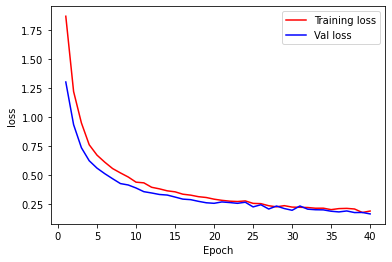

In [ ]:


get_diagnostic_plot(model,'loss')

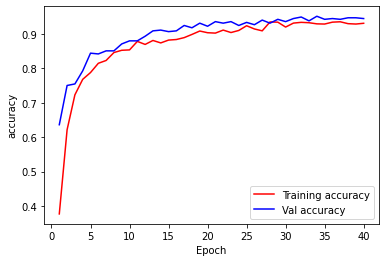

In [ ]:

get_diagnostic_plot(model,'accuracy')

In [ ]:
evaluation = model.evaluate(x_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

15/15 [==============================] - 0s 19ms/step - loss: 35.8102 - accuracy: 0.5857 - f1_score: 0.5256
Test Accuracy : 0.586


In [ ]:
predicted_classes = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Predicted:  Stop sign


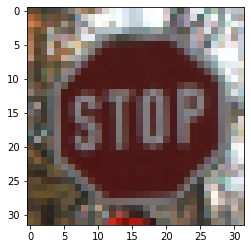

In [ ]:
mapping = ['Stop sign', 'Aheadonly sign', 'p_crossing sign','bike crossing sign', 'gostarightorleft sign','noentry', 'roundabout', 'speedlimit20','speedlimit100', 'truck']
# stop
# aheadonly
# p_crossing
# bike
# gostraightorleft
# noentry
# roundabout_images
# speedlimit20_images
# speedlimit100_images
# trucks_images

plt.imshow(x_test[66])
print()
print('Predicted: ', mapping[predicted_classes[66]])

Predicted:  truck


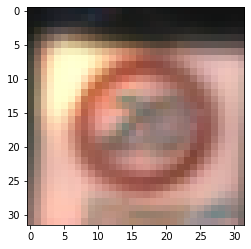

In [ ]:
print('Predicted: ', mapping[predicted_classes[5]])
plt.imshow(x_test[5])

Predicted:  Aheadonly sign


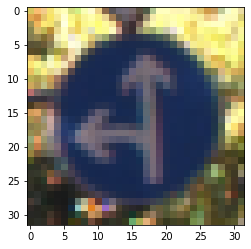

In [ ]:
print('Predicted: ', mapping[predicted_classes[79]])
plt.imshow(x_test[79])

Predicted:  p_crossing sign


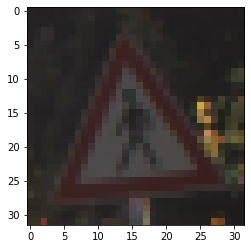

In [ ]:
print('Predicted: ', mapping[predicted_classes[42]])
plt.imshow(x_test[42])

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(rounded_labels,predicted_classes ) 
print(classification_report(rounded_labels, predicted_classes, target_names = mapping))

                       precision    recall  f1-score   support

            Stop sign       1.00      0.89      0.94        38
       Aheadonly sign       0.31      1.00      0.48        53
      p_crossing sign       0.60      1.00      0.75        41
   bike crossing sign       1.00      0.12      0.22        33
gostarightorleft sign       1.00      0.12      0.22        41
              noentry       0.93      0.59      0.72        64
           roundabout       1.00      0.23      0.37        48
         speedlimit20       0.60      0.76      0.67        33
        speedlimit100       1.00      0.06      0.12        48
                truck       0.67      0.90      0.77        62

             accuracy                           0.59       461
            macro avg       0.81      0.57      0.53       461
         weighted avg       0.80      0.59      0.54       461

